Outlier Detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/Clean_Dataset.csv',index_col=0)

In [3]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


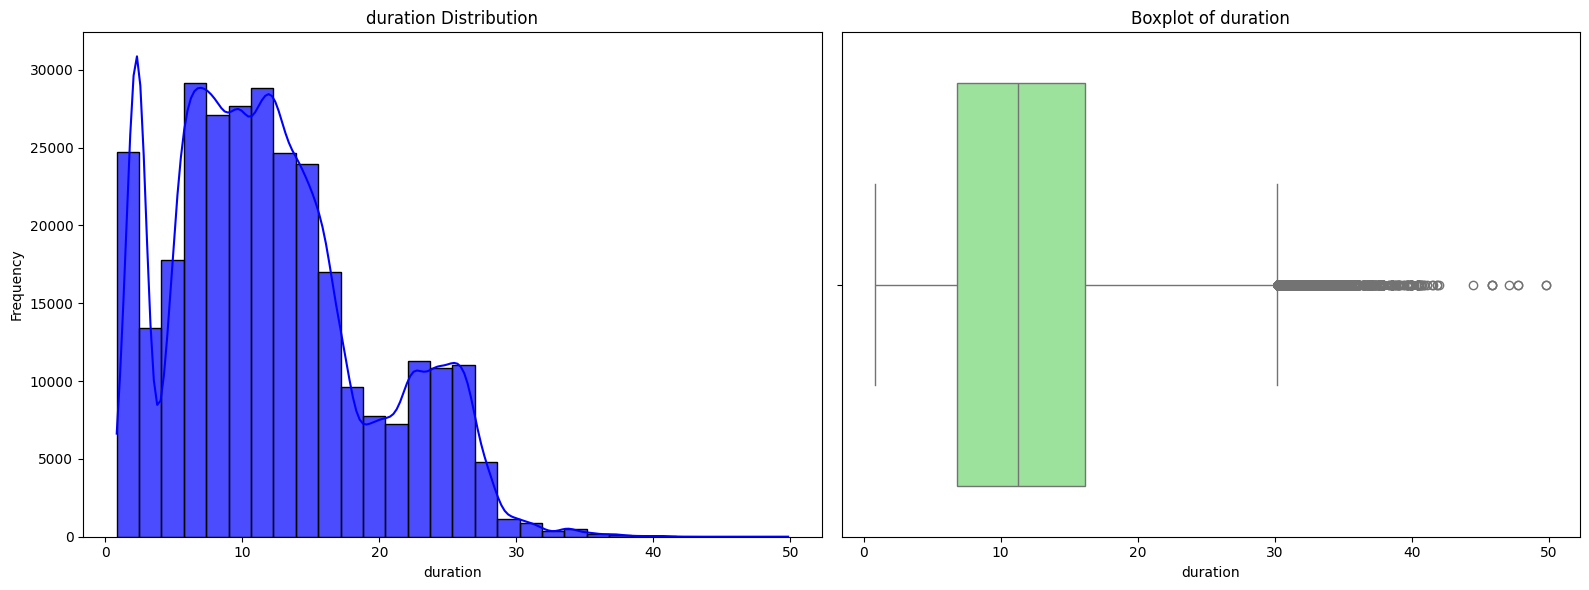

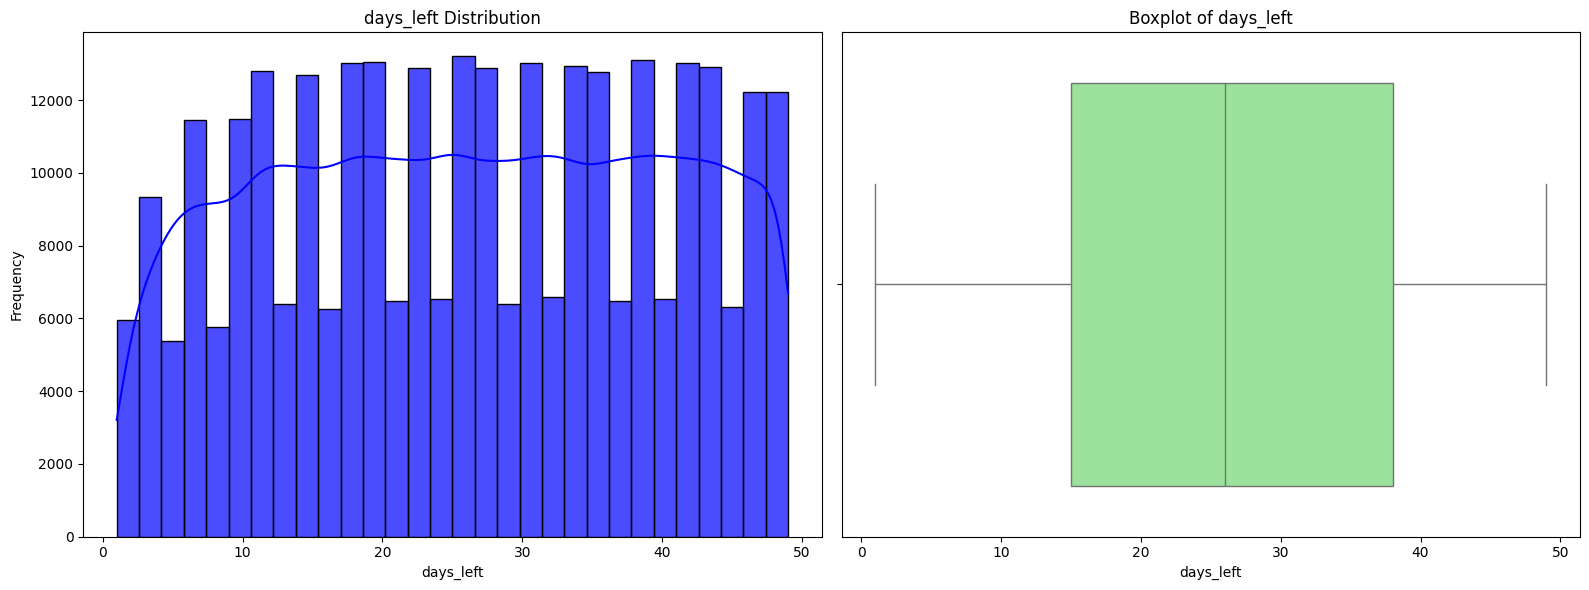

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features excluding 'price'
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [col for col in numeric_features if col != 'price']

# Plot settings
for feature in numeric_features:
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()


In [63]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(16, 6))

# plt.subplot(1, 2, 1)
# sns.histplot(df['price'], kde=True, bins=30, color='blue', alpha=0.7)
# plt.title('Price Distribution')
# plt.xlabel('Price')
# plt.ylabel('Frequency')

# plt.subplot(1, 2, 2)
# sns.boxplot(x=df['price'], color='lightgreen')
# plt.title('Boxplot of Price')
# plt.xlabel('Price')

# plt.tight_layout()
# plt.show()

In [64]:
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
# print(f"Number of outliers: {len(outliers)}")

In [6]:
# Select numeric features excluding 'price'
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [col for col in numeric_features if col != 'price']
outliers_indices = set()
outliers_per_feature = {}

# Identify and collect indices of outliers for each numeric feature
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find indices of outliers for the current feature
    feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_per_feature[feature] = feature_outliers.index.tolist()
    outliers_indices.update(feature_outliers.index)  # Add indices to the set to avoid duplicates

# Print outliers for each feature
for feature, indices in outliers_per_feature.items():
    print(f"Feature: {feature}")
    if indices:
        # print(f"Outliers indices: {indices}")
        print(f"Number of outliers: {len(indices)}")
    else:
        print("No outliers found.")
    print("-" * 40)

# Print total number of unique outliers
print(f"Total unique outlier rows: {len(outliers_indices)}")



Feature: duration
Number of outliers: 2110
----------------------------------------
Feature: days_left
No outliers found.
----------------------------------------
Total unique outlier rows: 2110


In [7]:
# Drop all outlier rows
if outliers_indices:
    df = df.drop(index=outliers_indices)
    print(f"Dropped {len(outliers_indices)} outlier rows.")
else:
    print("No outliers found.")

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

Dropped 2110 outlier rows.


In [67]:
# outliers_idx = outliers.index.tolist()

In [68]:
# if outliers_idx:
#     df = df.drop(outliers_idx)
#     print(f"Dropped {len(outliers_idx)} outlier rows.")
# else:
#     print("No outliers found.")
# df.reset_index(drop=True, inplace=True)

In [8]:
df.shape

(298043, 11)

In [9]:
stops_mapping = {'zero': 0 , 'one': 1, 'two_or_more': 2}
df['stops'] = df['stops'].map(stops_mapping)

In [10]:
df['stops'].value_counts()

stops
1    249573
0     36004
2     12466
Name: count, dtype: int64

In [11]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  object 
 1   flight            298043 non-null  object 
 2   source_city       298043 non-null  object 
 3   departure_time    298043 non-null  object 
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  object 
 6   destination_city  298043 non-null  object 
 7   class             298043 non-null  object 
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 25.0+ MB


In [13]:
time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}

df['arrival_time'] = df['arrival_time'].map(time_mapping)
df['departure_time'] = df['departure_time'].map(time_mapping)

In [14]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,Economy,2.33,1,5955


In [15]:
from sklearn.preprocessing import LabelEncoder

le_class = LabelEncoder()
le_fligh = LabelEncoder()

df['class'] = le_class.fit_transform(df['class'])
df['flight'] = le_fligh.fit_transform(df['flight'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  object 
 1   flight            298043 non-null  int32  
 2   source_city       298043 non-null  object 
 3   departure_time    298043 non-null  int64  
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  int64  
 6   destination_city  298043 non-null  object 
 7   class             298043 non-null  int32  
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int32(2), int64(5), object(3)
memory usage: 22.7+ MB


In [78]:
# city_mapping = {
#     'Delhi': 0,
#     'Mumbai': 1,
#     'Bangalore': 2,
#     'Kolkata': 3,
#     'Hyderabad': 4,
#     'Chennai': 5
# }

# df['source_city'] = df['source_city'].map(city_mapping)
# df['destination_city'] = df['destination_city'].map(city_mapping)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  object 
 1   flight            298043 non-null  int32  
 2   source_city       298043 non-null  object 
 3   departure_time    298043 non-null  int64  
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  int64  
 6   destination_city  298043 non-null  object 
 7   class             298043 non-null  int32  
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int32(2), int64(5), object(3)
memory usage: 22.7+ MB


In [17]:
# **Using pandas get_dummies() for one-hot encoding**
from sklearn.preprocessing import OneHotEncoder

df_pandas_encoded = pd.get_dummies(df, columns=['airline','source_city','destination_city'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

# **Using sklearn's OneHotEncoder**
# Define the column to encode
categorical_columns = ['airline','source_city','destination_city']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded columns with the original DataFrame (excluding original categorical column)
df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

print(f"One-Hot Encoded Data using scikit-learn:\n{df_sklearn_encoded}\n")

One-Hot Encoded Data using Pandas:
        flight  departure_time  stops  arrival_time  class  duration  \
0         1408               3      0             4      1      2.17   
1         1387               0      0             1      1      2.33   
2         1213               0      0             0      1      2.17   
3         1559               1      0             2      1      2.25   
4         1549               1      0             1      1      2.33   
...        ...             ...    ...           ...    ...       ...   
298038    1477               1      1             3      0     10.08   
298039    1481               2      1             4      0     10.42   
298040    1486               0      1             4      0     13.83   
298041    1483               0      1             3      0     10.00   
298042    1477               1      1             3      0     10.08   

        days_left  price  airline_Air_India  airline_GO_FIRST  ...  \
0               1   5953      

In [81]:
# df_sklearn_encoded['source_city'].unique()

In [18]:
df_sklearn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   flight                      298043 non-null  int32  
 1   departure_time              298043 non-null  int64  
 2   stops                       298043 non-null  int64  
 3   arrival_time                298043 non-null  int64  
 4   class                       298043 non-null  int32  
 5   duration                    298043 non-null  float64
 6   days_left                   298043 non-null  int64  
 7   price                       298043 non-null  int64  
 8   airline_AirAsia             298043 non-null  float64
 9   airline_Air_India           298043 non-null  float64
 10  airline_GO_FIRST            298043 non-null  float64
 11  airline_Indigo              298043 non-null  float64
 12  airline_SpiceJet            298043 non-null  float64
 13  airline_Vistar

In [19]:
df_sklearn_encoded.to_csv('./datasets/final_dataset.csv', index = False)

In [74]:
# df.head()
df_sklearn_encoded = pd.read_csv('./datasets/final_dataset.csv')

In [75]:
X=df_sklearn_encoded.drop(['price'],axis=1)
y=df_sklearn_encoded['price']

##### Without Feature Selection

In [22]:
import pickle 

In [23]:
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

def load_model(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((208630, 25), (89413, 25), (208630,), (89413,))

In [25]:
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

r2_scores = {}

def evaluate_metrics(X_train, X_test, y_train_pred, y_test_pred,model_name = None):
    n_train, k_train = X_train.shape
    n_test, k_test = X_test.shape

    # MSE and RMSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # R2 and Adjusted R2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    if model_name is not None:
        r2_scores[model_name] = r2_test

    adj_r2_train = adjusted_r2_score(r2_train, n_train, k_train)
    adj_r2_test = adjusted_r2_score(r2_test, n_test, k_test)

    # MAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print(f'Train MSE: {mse_train}, Test MSE: {mse_test}')
    print(f'Train RMSE: {rmse_train}, Test RMSE: {rmse_test}')
    print(f'Train R2: {r2_train}, Test R2: {r2_test}')
    print(f'Train Adjusted R2: {adj_r2_train}, Test Adjusted R2: {adj_r2_test}')
    print(f'Train MAE: {mae_train}, Test MAE: {mae_test}')

In [58]:
X_train.head()

,departure_time,stops,arrival_time,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
148173,1,1,1,1,22.42,15,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
186026,1,2,4,1,13.25,49,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
137428,2,1,4,1,8.42,22,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
277991,0,1,4,0,13.08,45,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89994,3,1,4,1,25.25,32,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Random Forest')

Train MSE: 1275850.0525909076, Test MSE: 7664316.638567866
Train RMSE: 1129.5353259597096, Test RMSE: 2768.450223241853
Train R2: 0.997530109650164, Test R2: 0.9851773101684422
Train Adjusted R2: 0.9975298254893414, Test Adjusted R2: 0.9851733303886513
Train MAE: 424.90132663514174, Test MAE: 1096.1823256413131


In [94]:
# save_model(rf_regressor, './checkpoint/random_forest.pkl')

In [61]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Linear Regression')

Train MSE: 46653558.749245316, Test MSE: 46741663.4570259
Train RMSE: 6830.3410419425845, Test RMSE: 6836.787510009793
Train R2: 0.9096843909625023, Test R2: 0.9096022238762811
Train Adjusted R2: 0.9096740001539555, Test Adjusted R2: 0.909577952759051
Train MAE: 4531.2434953304455, Test MAE: 4534.492873197308


In [63]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [64]:
y_pred = dt_regressor.predict(X_test)
y_train_pred = dt_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Decision Tree')

Train MSE: 326596.7456653726, Test MSE: 12533549.887289258
Train RMSE: 571.4864352417934, Test RMSE: 3540.2753970968497
Train R2: 0.9993677484679577, Test R2: 0.9757602756737933
Train Adjusted R2: 0.9993676757274349, Test Adjusted R2: 0.9757537674916679
Train MAE: 50.85519340459185, Test MAE: 1194.0817013931605


In [65]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=300, random_state=42)
bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)
y_train_pred = bagging_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Bagging Regressor')

Train MSE: 1246775.2770815166, Test MSE: 7629874.347625312
Train RMSE: 1116.5909175170273, Test RMSE: 2762.2227186860428
Train R2: 0.9975863948753034, Test R2: 0.9852439211162678
Train Adjusted R2: 0.9975861171900946, Test Adjusted R2: 0.985239959221011
Train MAE: 422.27682346180137, Test MAE: 1093.594826529812


In [66]:
#XGB
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
y_train_pred = xgb_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'XGBoost')


Train MSE: 16443417.810380258, Test MSE: 16993185.241696216
Train RMSE: 4055.0484350227257, Test RMSE: 4122.279131948274
Train R2: 0.9681675434112549, Test R2: 0.9671353697776794
Train Adjusted R2: 0.9681638810879255, Test Adjusted R2: 0.96712654587374
Train MAE: 2310.1631521081167, Test MAE: 2342.8834860663264


In [67]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
y_train_pred = ridge_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Ridge')


Train MSE: 46653559.03510934, Test MSE: 46741701.4413082
Train RMSE: 6830.341062868628, Test RMSE: 6836.790287942742
Train R2: 0.9096843904091044, Test R2: 0.9096021504151675
Train Adjusted R2: 0.909673999600494, Test Adjusted R2: 0.9095778792782135
Train MAE: 4531.234280869949, Test MAE: 4534.48592875662


In [68]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
y_train_pred = lasso_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Lasso')


Train MSE: 46653727.54315204, Test MSE: 46741901.35209028
Train RMSE: 6830.353398115799, Test RMSE: 6836.804908149002
Train R2: 0.9096840641980519, Test R2: 0.9096017637902853
Train Adjusted R2: 0.909673673351911, Test Adjusted R2: 0.9095774925495256
Train MAE: 4529.637624859879, Test MAE: 4532.879334454213


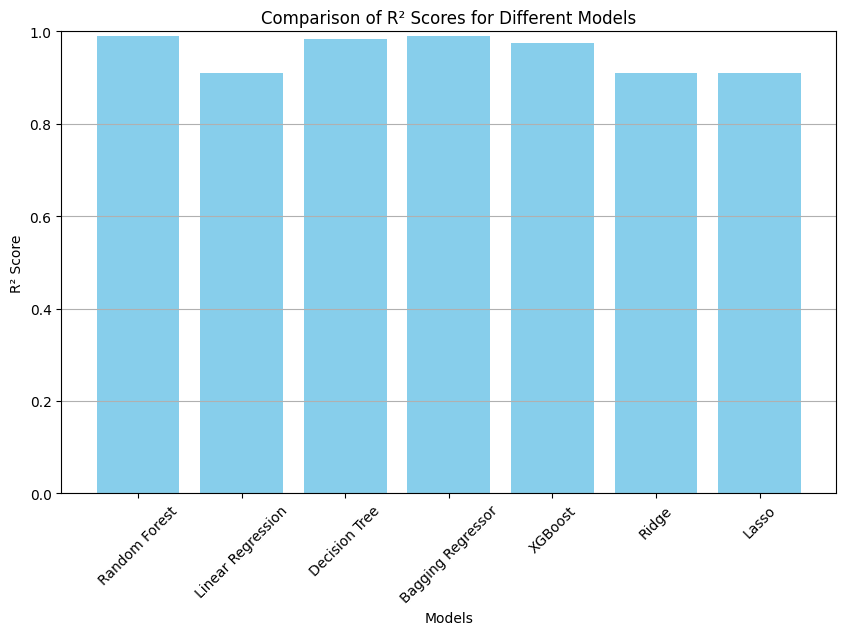

In [103]:
# Plotting the bar chart
models = list(r2_scores.keys())
r2_values = list(r2_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='skyblue')  
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.title('Comparison of R² Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y')  

# Display the plot
plt.show()


In [88]:
combined_r2 = {}

In [89]:
combined_r2['No Feature Selection'] = r2_scores.copy()

In [90]:
r2_scores = {}

##### Feature Selection

[5.12616834e-03 3.08972564e-02 5.18782733e-03 8.80621155e-01
 2.61665583e-02 1.84637879e-02 3.50784295e-04 5.28173126e-03
 7.33882789e-05 2.69987373e-04 4.95691590e-05 5.39313978e-03
 1.08684741e-03 8.02782511e-04 4.12145306e-03 1.31249627e-03
 1.82597784e-03 2.18859487e-03 1.13524538e-03 7.68942308e-04
 3.85360900e-03 1.33001621e-03 1.84342796e-03 1.84925362e-03]


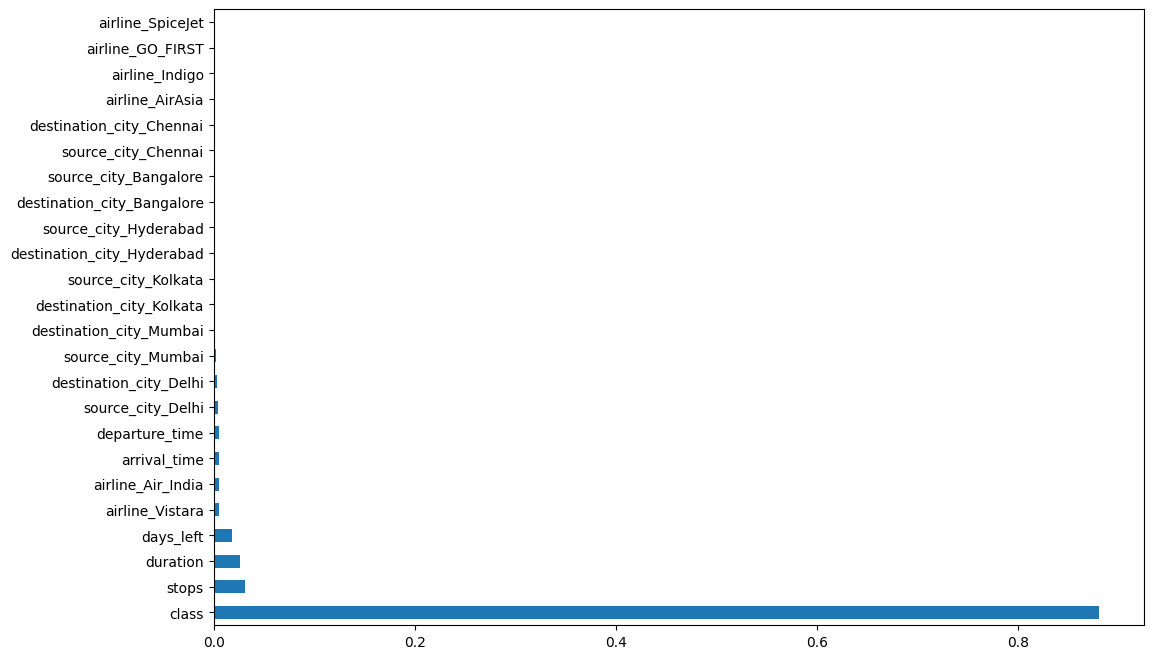

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

# Plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

Explained variance ratio:
[7.68282999e-01 2.04852057e-01 8.46963179e-03 7.29444327e-03
 1.50222578e-03 1.04388988e-03 1.00919014e-03 9.59988531e-04
 8.16522175e-04 7.09750177e-04 6.42661703e-04 6.26103250e-04
 5.90599139e-04 5.65732770e-04 5.19934145e-04 4.91673289e-04
 4.81090088e-04 4.13319716e-04 3.46526745e-04 2.45904954e-04
 1.35756243e-04 3.86836030e-19 6.46305212e-20 0.00000000e+00]


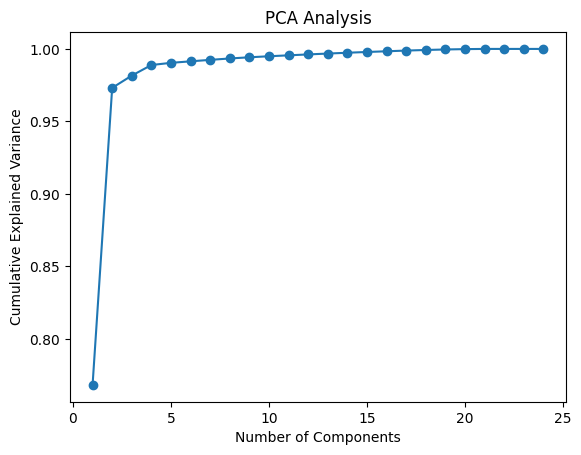

In [70]:
from sklearn.decomposition import PCA

# Fit PCA on the features
pca = PCA()
pca.fit(X)

# Examine the explained variance ratio for each component
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

# Visualize cumulative variance explained
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Analysis")
plt.show()


In [71]:
from sklearn.decomposition import PCA
import pandas as pd

# Initialize PCA with the optimal number of components (e.g., 5 or 6)
n_components = 6
pca = PCA(n_components=n_components)

# Fit PCA on the data and transform it
X_pca = pca.fit_transform(X)

# Create a DataFrame of the principal components
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the transformed dataset
print(X_pca_df.head())

# Optional: Variance explained by selected components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")


         PC1        PC2       PC3       PC4       PC5       PC6
0 -24.787237 -10.521277  0.869713  1.532065 -0.339021 -1.021167
1 -24.790486 -10.373254 -0.458202 -2.494419 -0.299746 -0.954338
2 -24.785997 -10.509164  0.003006 -3.376961 -0.306120 -0.936679
3 -24.788808 -10.439613 -0.018690 -1.144647  0.499523 -0.996348
4 -24.790913 -10.332312  0.428102 -2.034876  0.509579 -0.975269
Explained Variance by each component: [0.768283   0.20485206 0.00846963 0.00729444 0.00150223 0.00104389]
Total explained variance: 0.9914452469326122


In [76]:
X = X.drop(['flight'],axis=1)

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((208630, 24), (89413, 24), (208630,), (89413,))

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Random Forest')

Train MSE: 1275850.0525909076, Test MSE: 7664316.638567866
Train RMSE: 1129.5353259597096, Test RMSE: 2768.450223241853
Train R2: 0.997530109650164, Test R2: 0.9851773101684422
Train Adjusted R2: 0.9975298254893414, Test Adjusted R2: 0.9851733303886513
Train MAE: 424.90132663514174, Test MAE: 1096.1823256413131


In [ ]:
save_model(rf_regressor, './checkpoint/random_forest.pkl')

In [79]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Linear Regression')

Train MSE: 46653558.749245316, Test MSE: 46741663.4570259
Train RMSE: 6830.3410419425845, Test RMSE: 6836.787510009793
Train R2: 0.9096843909625023, Test R2: 0.9096022238762811
Train Adjusted R2: 0.9096740001539555, Test Adjusted R2: 0.909577952759051
Train MAE: 4531.2434953304455, Test MAE: 4534.492873197308


In [81]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [82]:
y_pred = dt_regressor.predict(X_test)
y_train_pred = dt_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Decision Tree')

Train MSE: 326596.7456653726, Test MSE: 12533549.887289258
Train RMSE: 571.4864352417934, Test RMSE: 3540.2753970968497
Train R2: 0.9993677484679577, Test R2: 0.9757602756737933
Train Adjusted R2: 0.9993676757274349, Test Adjusted R2: 0.9757537674916679
Train MAE: 50.85519340459185, Test MAE: 1194.0817013931605


In [83]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=300, random_state=42)
bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)
y_train_pred = bagging_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Bagging Regressor')

Train MSE: 1246775.2770815166, Test MSE: 7629874.347625312
Train RMSE: 1116.5909175170273, Test RMSE: 2762.2227186860428
Train R2: 0.9975863948753034, Test R2: 0.9852439211162678
Train Adjusted R2: 0.9975861171900946, Test Adjusted R2: 0.985239959221011
Train MAE: 422.27682346180137, Test MAE: 1093.594826529812


In [84]:
#XGB
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
y_train_pred = xgb_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'XGBoost')


Train MSE: 16443417.810380258, Test MSE: 16993185.241696216
Train RMSE: 4055.0484350227257, Test RMSE: 4122.279131948274
Train R2: 0.9681675434112549, Test R2: 0.9671353697776794
Train Adjusted R2: 0.9681638810879255, Test Adjusted R2: 0.96712654587374
Train MAE: 2310.1631521081167, Test MAE: 2342.8834860663264


In [85]:
#Ridge Regression
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
y_train_pred = ridge_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Ridge')


Train MSE: 46653559.03510934, Test MSE: 46741701.4413082
Train RMSE: 6830.341062868628, Test RMSE: 6836.790287942742
Train R2: 0.9096843904091044, Test R2: 0.9096021504151675
Train Adjusted R2: 0.909673999600494, Test Adjusted R2: 0.9095778792782135
Train MAE: 4531.234280869949, Test MAE: 4534.48592875662


In [86]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
y_train_pred = lasso_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Lasso')


Train MSE: 46653727.54315204, Test MSE: 46741901.35209028
Train RMSE: 6830.353398115799, Test RMSE: 6836.804908149002
Train R2: 0.9096840641980519, Test R2: 0.9096017637902853
Train Adjusted R2: 0.909673673351911, Test Adjusted R2: 0.9095774925495256
Train MAE: 4529.637624859879, Test MAE: 4532.879334454213


In [ ]:
# Plotting the bar chart
models = list(r2_scores.keys())
r2_values = list(r2_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='skyblue')  
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.title('Comparison of R² Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y')  

# Display the plot
plt.show()


In [ ]:
combined_r2['Feature Selection'] = r2_scores.copy()

In [ ]:
models = list(combined_r2['No Feature Selection'].keys())
no_fs_values = list(combined_r2['No Feature Selection'].values())
fs_values = list(combined_r2['Feature Selection'].values())

# Plotting
x = np.arange(len(models))  # The label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for No Feature Selection and Feature Selection
bars1 = ax.bar(x - width/2, no_fs_values, width, label='No Feature Selection', color='skyblue')
bars2 = ax.bar(x + width/2, fs_values, width, label='Feature Selection', color='orange')

# Adding labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Performance Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend()

# Displaying the values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01*height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Display the plot
plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],          # Number of trees in the forest
    'max_depth': [10, 20],              # Maximum depth of the trees
    'min_samples_split': [5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [2, 4],         # Minimum samples required at each leaf node
    'max_features': ['sqrt']    # Number of features to consider when looking for the best split
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Correct scoring metric
                           cv=5,                              # 5-fold cross-validation
                           verbose=2,                         # For detailed output
                           n_jobs=-1)                         # Use all available CPUs

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)  # Convert to positive MSE

# Use the best model from Grid Search to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Evaluate the best model
def evaluate_metrics(X_train, X_test, y_train_pred, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Train R^2: {r2_score(y_train, y_train_pred):.4f}")
    print(f"Test R^2: {r2_score(y_test, y_pred):.4f}")

evaluate_metrics(X_train, X_test, y_train_pred, y_pred, 'Tuned Random Forest')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score (MSE):  9853709.053535026
Evaluation for Tuned Random Forest:
Train MSE: 6630532.5008
Test MSE: 9558038.1166
Train R^2: 0.9872
Test R^2: 0.9815
